*Nama : Arum Rahmah Romadoni* <br>
*Nim : 211351029* <br>
*Kelas : IF Pagi B* <br>

#  Import dataset

#  Import library

In [34]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib.axes import Axes

!pip -qq install efficient-apriori
from efficient_apriori import apriori

In [35]:
sns.set_palette("autumn")

mpl.rc("axes", titlesize=18, titlepad=15, titleweight=500)
mpl.rc("axes.spines", right=False, top=False)
mpl.rc("figure", figsize=(10, 5.5))
mpl.rc("font", family="serif", size=10)

In [36]:
def annotate_column_chart(ax: Axes) -> Axes:
    """Add annotations to a column chart.

    Args:
        ax (matplotlib.axes.Axes): A column chart.

    Returns:
        matplotlib.axes.Axes: Annotated column chart.
    """
    for p in ax.patches:
        p.set_width(0.7)
        ax.annotate(f"{p.get_height():,}", ha="center",
                xy=(p.get_x() + p.get_width() / 2, p.get_height() * 1.01))
    return ax

#  Data discovery

In [37]:
data = pd.read_csv('Market_Basket_Optimisation.csv',
                   header=None,
                   names=[f"item_{idx}" for idx in range(1, 21)]
)

print(
    f"There were a total of {data.shape[0]:,} transactions, each containing",
    f"between {data.notna().sum(axis=1).min()} and {data.shape[1]} items.\n"
)
data.head()

There were a total of 7,501 transactions, each containing between 1 and 20 items.



,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data.sample(10)

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
1365,turkey,shrimp,frozen vegetables,mineral water,chocolate,olive oil,honey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2077,pancakes,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5433,turkey,pepper,carrots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7464,herb & pepper,ground beef,eggs,whole wheat rice,cake,oil,fresh bread,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7355,avocado,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,red wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,burgers,pancakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2048,eggs,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5907,burgers,shrimp,milk,cake,mint green tea,french fries,fresh bread,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6185,yogurt cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_1   7501 non-null   object
 1   item_2   5747 non-null   object
 2   item_3   4389 non-null   object
 3   item_4   3345 non-null   object
 4   item_5   2529 non-null   object
 5   item_6   1864 non-null   object
 6   item_7   1369 non-null   object
 7   item_8   981 non-null    object
 8   item_9   654 non-null    object
 9   item_10  395 non-null    object
 10  item_11  256 non-null    object
 11  item_12  154 non-null    object
 12  item_13  87 non-null     object
 13  item_14  47 non-null     object
 14  item_15  25 non-null     object
 15  item_16  8 non-null      object
 16  item_17  4 non-null      object
 17  item_18  4 non-null      object
 18  item_19  3 non-null      object
 19  item_20  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [40]:
data.describe()

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [41]:
#Data Cleaning
all_products = data.melt()["value"].dropna().sort_values()

# Find items that start or end with whitespace
all_products[all_products.str.contains("^\s|\s$")].to_list()

[' asparagus']

In [42]:
data.replace(" asparagus", "asparagus", inplace=True)
all_products.replace(" asparagus", "asparagus", inplace=True)

print(f"There are {all_products.nunique()} different products:\n\n", all_products.unique())

There are 119 different products:

 ['asparagus' 'almonds' 'antioxydant juice' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffi

# EDA

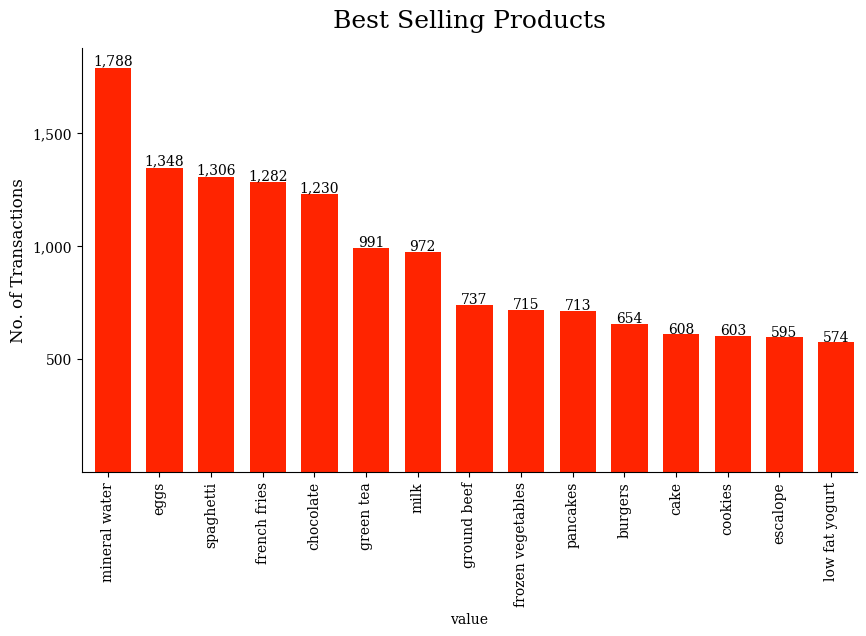

In [43]:
item_counts = all_products.value_counts()

ax = item_counts.nlargest(15).plot(kind="bar", title="Best Selling Products")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([500, 1000, 1500]))

_ = annotate_column_chart(ax)

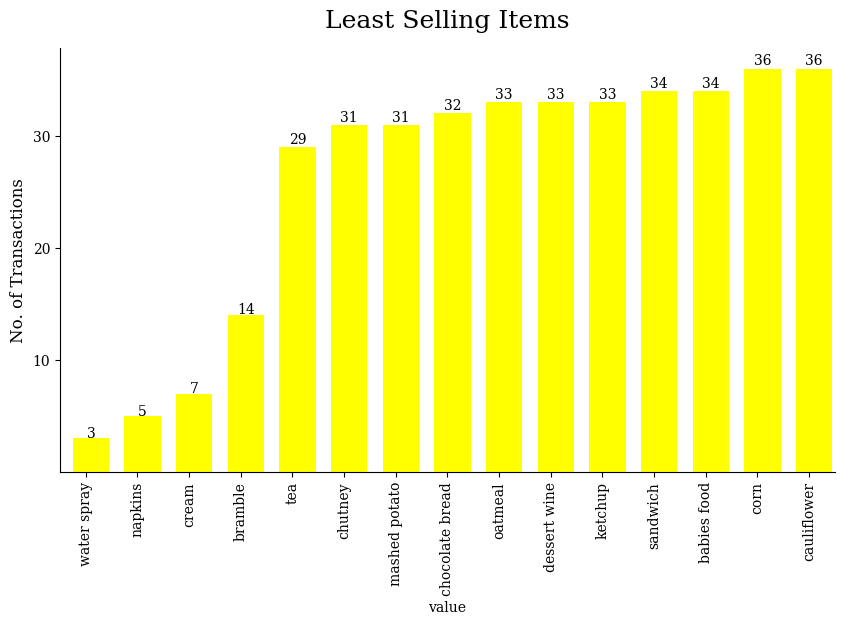

In [44]:
ax = item_counts.nsmallest(15).plot(kind="bar", color="yellow", title="Least Selling Items")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([10, 20, 30]))

_ = annotate_column_chart(ax)

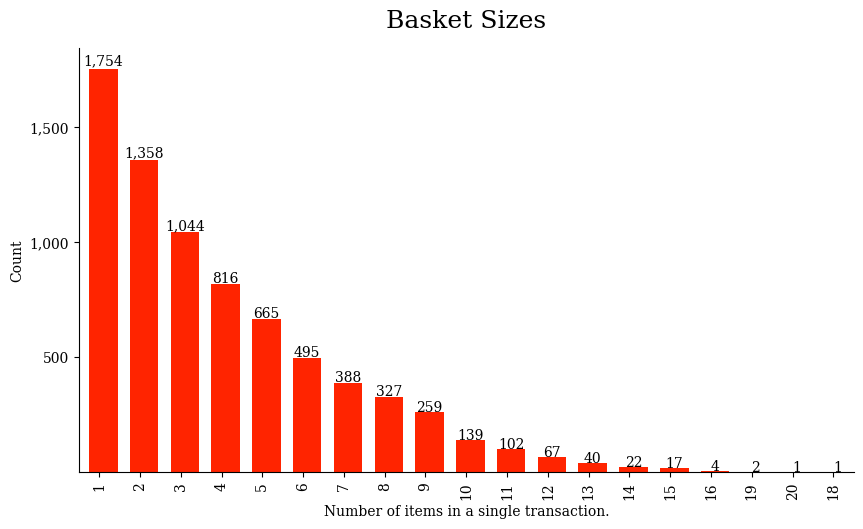

In [45]:
basket_sizes = data.notna().apply(sum, axis=1)

ax = basket_sizes.value_counts().plot.bar(title="Basket Sizes")
ax.set_ylabel("Count")
ax.set_xlabel("Number of items in a single transaction.")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([500, 1000, 1500]))

_ = annotate_column_chart(ax)

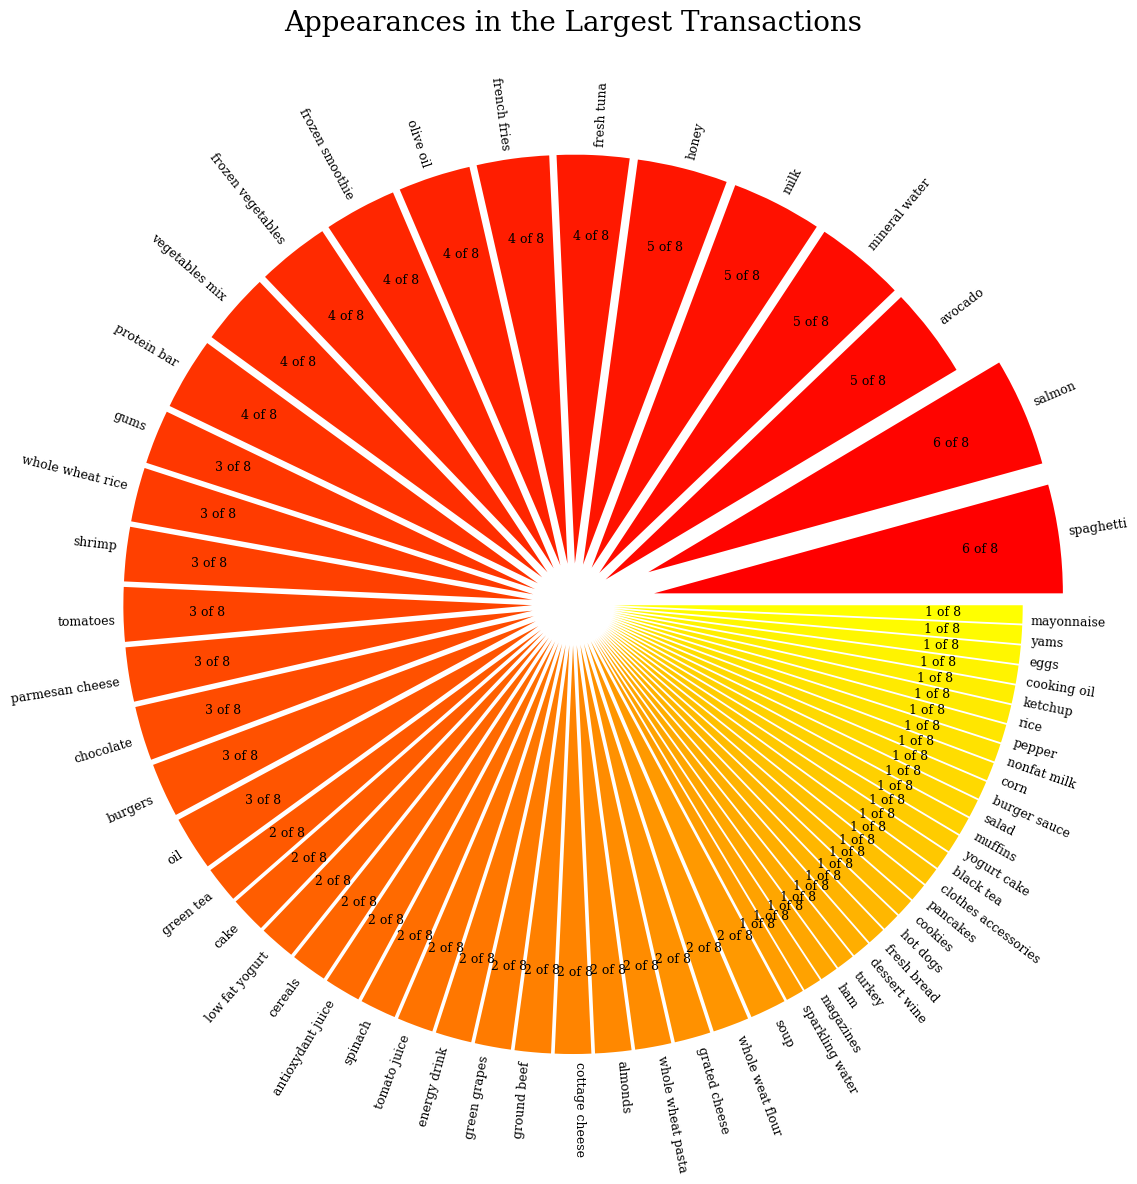

In [46]:
items_in_largest_transactions = data[basket_sizes > 15].melt()['value'].dropna()

pie_data = items_in_largest_transactions.value_counts()
ax = pie_data.plot.pie(
    cmap="autumn",
    explode=[0.2] * 2 + [0.1] * 59,
    figsize=(12, 12),
    autopct=lambda pct: f" {pct * 0.01 * pie_data.sum():.0f} of 8",
    pctdistance=0.8,
    labeldistance=1.02,
    rotatelabels=True,
    textprops={"size": 9},
)
ax.set_title("Appearances in the Largest Transactions", size=20, pad=45)
ax.set_ylabel("")
ax.figure.tight_layout()

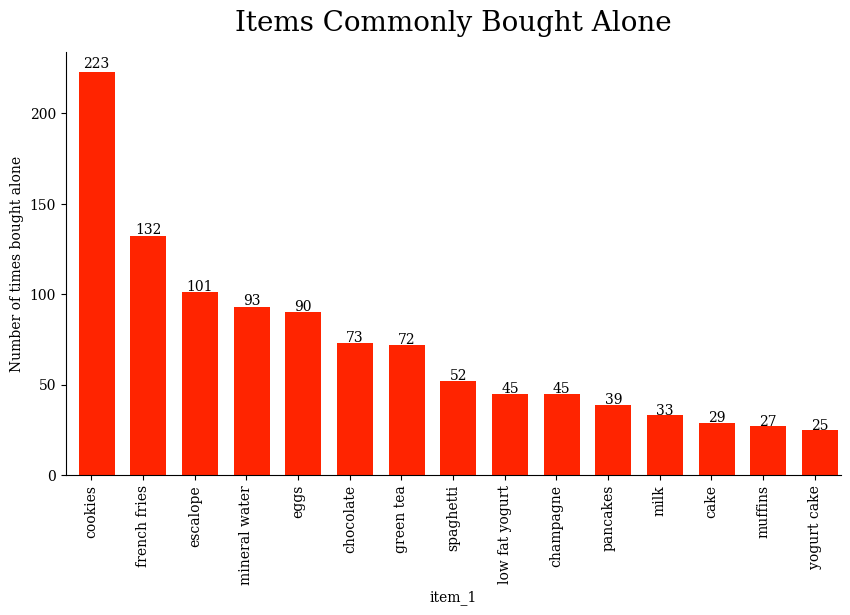

In [47]:
single_items = data[basket_sizes == 1]["item_1"].value_counts()
ax = single_items.head(15).plot.bar()
ax.set_title("Items Commonly Bought Alone", size=20, pad=15, weight=500)
ax.set_ylabel("Number of times bought alone")

_ = annotate_column_chart(ax)

# Preprocessing

In [48]:
baskets = [tuple(row.dropna()) for _, row in data[basket_sizes > 1].iterrows()]
baskets[-5:]

[('pancakes', 'light mayo'),
 ('butter', 'light mayo', 'fresh bread'),
 ('burgers',
  'frozen vegetables',
  'eggs',
  'french fries',
  'magazines',
  'green tea'),
 ('escalope', 'green tea'),
 ('eggs', 'frozen smoothie', 'yogurt cake', 'low fat yogurt')]

# Modelling

In [49]:
item_sets, association_rules = apriori(baskets, min_support=0.01, min_confidence=0.3)

In [71]:
target_data = "turkey"

one_to_one_rules = filter(
    lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, association_rules
)

for rule in sorted(one_to_one_rules, key=lambda rule: rule.lift):
    if target_data in rule.lhs or target_data in rule.rhs:
        
        # Extract the recommended item ('rhs')
        recommended_item = [item for item in rule.rhs][0]
        print("Recommended Item:", recommended_item)
        

Recommended Item: mineral water
Recommended Item: eggs


In [73]:
def return_item_df():
    target_data = "turkey"
    recommended_items = []

    one_to_one_rules = filter(
        lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, association_rules
    )

    for rule in sorted(one_to_one_rules, key=lambda rule: rule.lift):
        if target_data in rule.lhs or target_data in rule.rhs:
            
            # Extract the recommended item ('rhs')
            recommended_item = [item for item in rule.rhs][0]
            print("Recommended Item:", recommended_item)

            
            recommended_items.append(recommended_item)

    return recommended_items

# Panggil fungsi dan simpan hasilnya
result = return_item_df()
print(result)

Recommended Item: mineral water
Recommended Item: eggs
['mineral water', 'eggs']
